# Diabetes Data Analysis


## 1.Import Libraries


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')


## 2. Loading Data


In [2]:
df = pd.read_csv("../data/raw/diabetes_raw_data.csv")

## 3.Exploratory Data Analysis

In [3]:
df.shape

(1879, 46)

In [4]:
df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,6000,44,0,1,2,1,32.985284,1,4.499365,2.443385,...,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1,Confidential
1,6001,51,1,0,1,2,39.916764,0,1.578919,8.301264,...,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1,Confidential
2,6002,89,1,0,1,3,19.782251,0,1.177301,6.103395,...,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0,Confidential
3,6003,21,1,1,1,2,32.376881,1,1.714621,8.645465,...,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0,Confidential
4,6004,27,1,0,1,3,16.808600,0,15.462549,4.629383,...,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0,Confidential


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1879 non-null   int64  
 1   Age                            1879 non-null   int64  
 2   Gender                         1879 non-null   int64  
 3   Ethnicity                      1879 non-null   int64  
 4   SocioeconomicStatus            1879 non-null   int64  
 5   EducationLevel                 1879 non-null   int64  
 6   BMI                            1879 non-null   float64
 7   Smoking                        1879 non-null   int64  
 8   AlcoholConsumption             1879 non-null   float64
 9   PhysicalActivity               1879 non-null   float64
 10  DietQuality                    1879 non-null   float64
 11  SleepQuality                   1879 non-null   float64
 12  FamilyHistoryDiabetes          1879 non-null   i

In [6]:
df.describe()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,SlowHealingSores,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,...,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,6939.000000,55.043108,0.487493,0.755721,0.992017,1.699308,27.687601,0.281533,10.096587,5.200790,...,0.102714,0.111229,48.508643,0.052155,0.103246,0.200639,1.997101,4.957539,5.011736,0.400213
std,542.564896,20.515839,0.499977,1.047558,0.764940,0.885665,7.190975,0.449866,5.914216,2.857012,...,0.303666,0.314500,28.758488,0.222400,0.304361,0.400585,1.122632,2.910934,2.920908,0.490072
min,6000.000000,20.000000,0.000000,0.000000,0.000000,0.000000,15.025898,0.000000,0.000928,0.004089,...,0.000000,0.000000,0.002390,0.000000,0.000000,0.000000,0.004013,0.005384,0.000362,0.000000
25%,6469.500000,38.000000,0.000000,0.000000,0.000000,1.000000,21.469981,0.000000,4.789725,2.751022,...,0.000000,0.000000,23.974098,0.000000,0.000000,0.000000,1.057801,2.420024,2.410113,0.000000
50%,6939.000000,55.000000,0.000000,0.000000,1.000000,2.000000,27.722988,0.000000,10.173865,5.249002,...,0.000000,0.000000,47.519693,0.000000,0.000000,0.000000,1.987170,4.843886,5.035208,0.000000
75%,7408.500000,73.000000,1.000000,1.000000,2.000000,2.000000,33.856460,1.000000,15.285359,7.671402,...,0.000000,0.000000,72.883179,0.000000,0.000000,0.000000,2.946019,7.513933,7.586865,1.000000
max,7878.000000,90.000000,1.000000,3.000000,2.000000,3.000000,39.998811,1.000000,19.996231,9.993893,...,1.000000,1.000000,99.788530,1.000000,1.000000,1.000000,3.999715,9.997165,9.993029,1.000000


In [7]:
df.dtypes.value_counts()

int64      27
float64    18
object      1
Name: count, dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isna().sum()

PatientID                        0
Age                              0
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          0
AlcoholConsumption               0
PhysicalActivity                 0
DietQuality                      0
SleepQuality                     0
FamilyHistoryDiabetes            0
GestationalDiabetes              0
PolycysticOvarySyndrome          0
PreviousPreDiabetes              0
Hypertension                     0
SystolicBP                       0
DiastolicBP                      0
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  0
BUNLevels                        0
CholesterolTotal                 0
CholesterolLDL                   0
CholesterolHDL                   0
CholesterolTriglycerides         0
AntihypertensiveMedications      0
Statins             

## 4. Data Preprocessing

### 4.1 Encoding Categorical Features

In [10]:
le = LabelEncoder()
df['DoctorInCharge'] = le.fit_transform(df['DoctorInCharge'].astype(str))

df['DoctorInCharge'].head()

0    0
1    0
2    0
3    0
4    0
Name: DoctorInCharge, dtype: int64

### 4.2 Outlier Capping

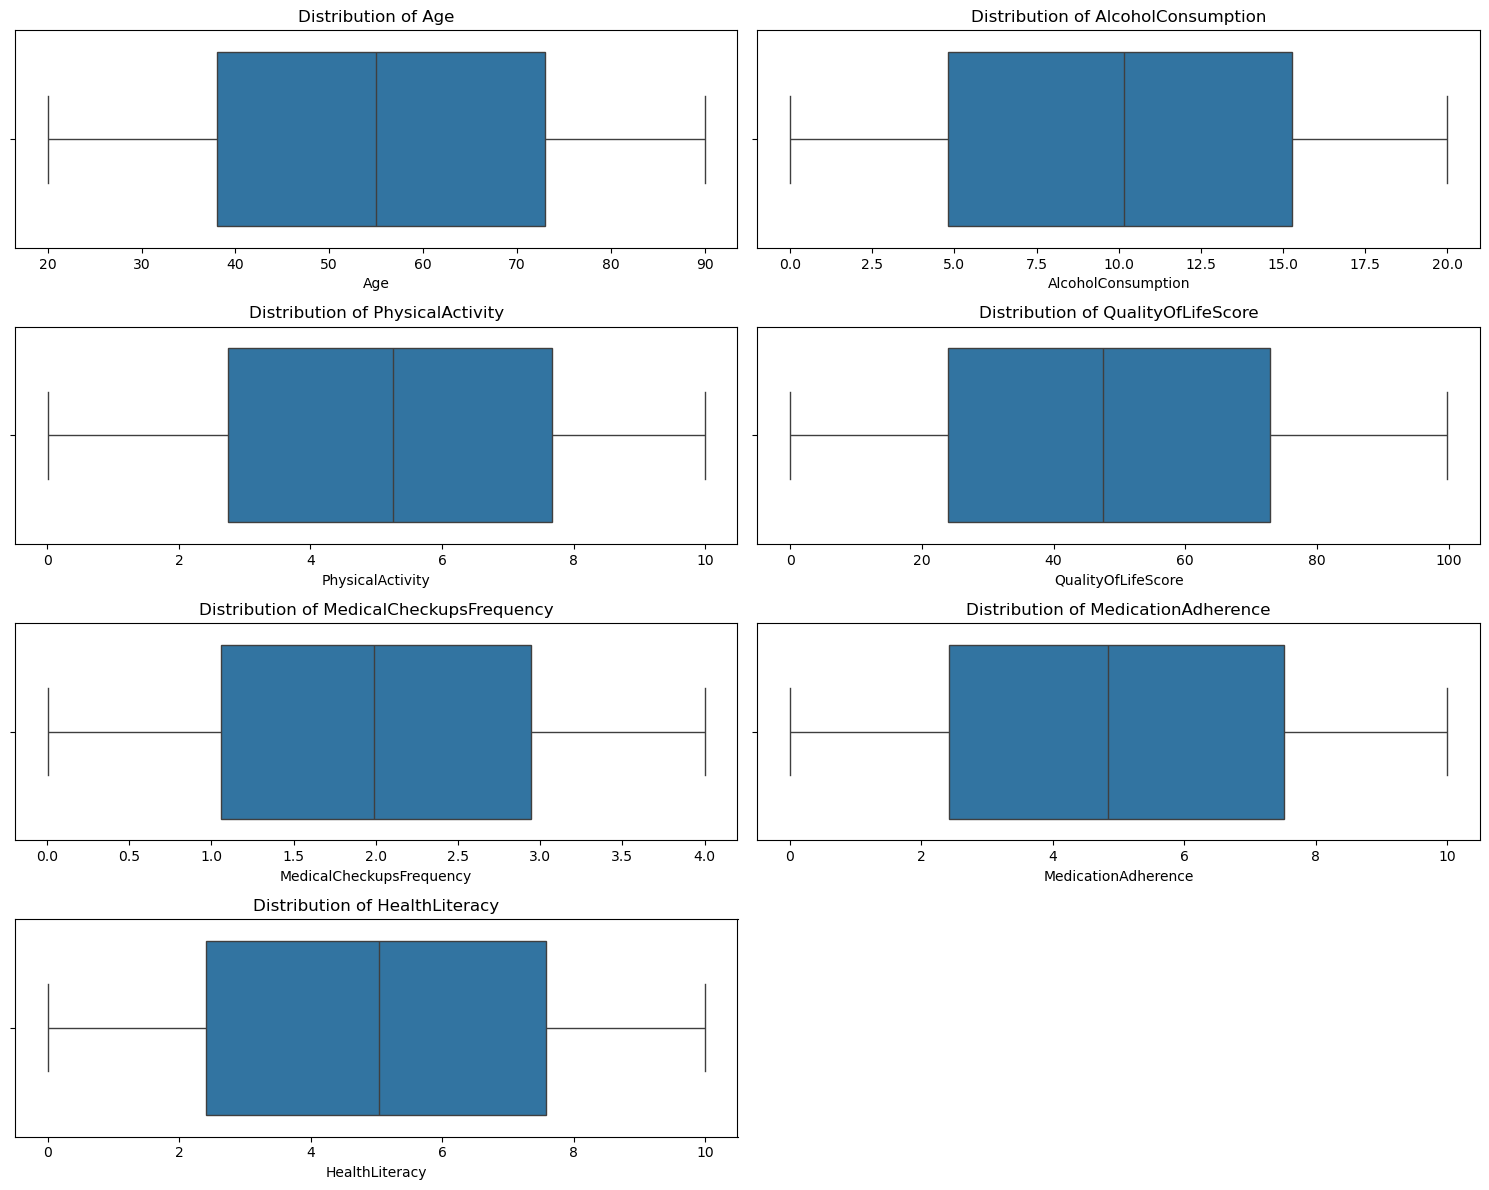

In [11]:
columns = ['Age', 'AlcoholConsumption', 'PhysicalActivity',
           'QualityOfLifeScore', 'MedicalCheckupsFrequency',
           'MedicationAdherence', 'HealthLiteracy']

plt.figure(figsize=(15, 12))

for i, column in enumerate(columns):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x=column, data=df)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [12]:
df['Age'] = df['Age'].clip(18, 90)
df['AlcoholConsumption'] = df['AlcoholConsumption'].clip(0, 20)
df['PhysicalActivity'] = df['PhysicalActivity'].clip(0, 10)
df['QualityOfLifeScore'] = df['QualityOfLifeScore'].clip(10, 100)
df['MedicalCheckupsFrequency'] = df['MedicalCheckupsFrequency'].clip(0, 4)
df['MedicationAdherence'] = df['MedicationAdherence'].clip(0, 10)
df['HealthLiteracy'] = df['HealthLiteracy'].clip(0, 10)

df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,6000,44,0,1,2,1,32.985284,1,4.499365,2.443385,...,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1,0
1,6001,51,1,0,1,2,39.916764,0,1.578919,8.301264,...,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1,0
2,6002,89,1,0,1,3,19.782251,0,1.177301,6.103395,...,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0,0
3,6003,21,1,1,1,2,32.376881,1,1.714621,8.645465,...,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0,0
4,6004,27,1,0,1,3,16.808600,0,15.462549,4.629383,...,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0,0


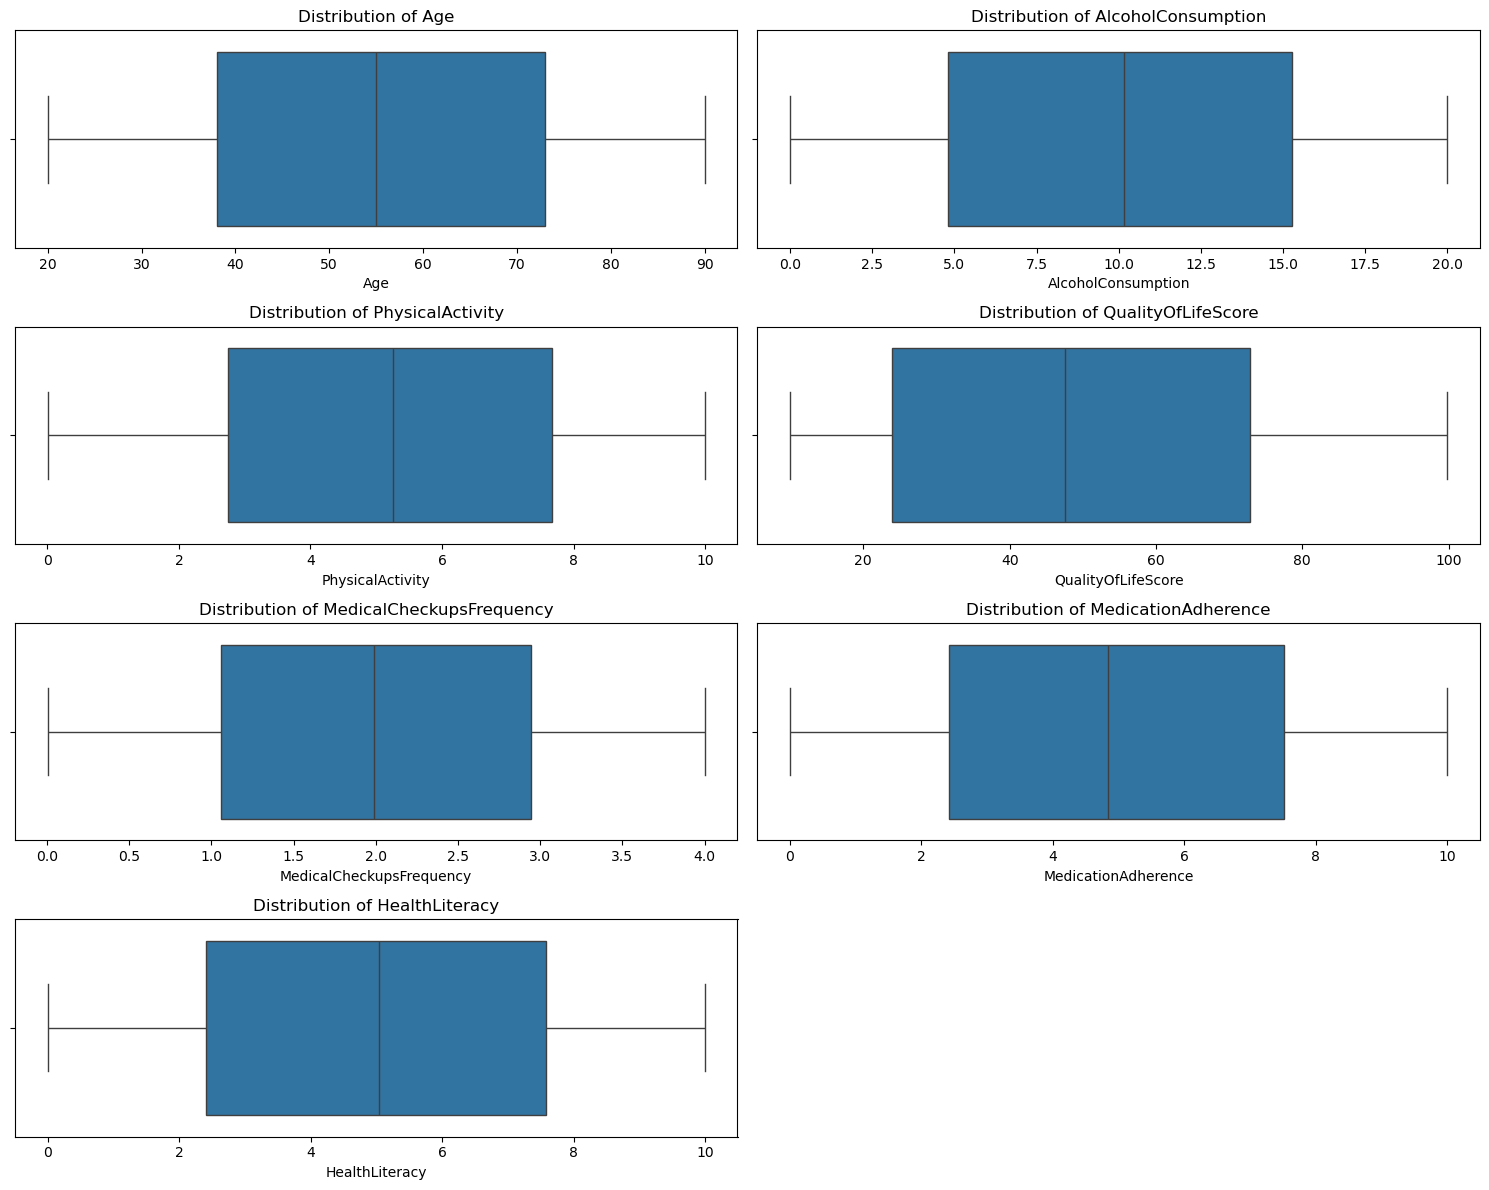

In [13]:
columns = ['Age', 'AlcoholConsumption', 'PhysicalActivity',
           'QualityOfLifeScore', 'MedicalCheckupsFrequency',
           'MedicationAdherence', 'HealthLiteracy']

plt.figure(figsize=(15, 12))

for i, column in enumerate(columns):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x=column, data=df)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

## 5. Feature Engineering

In [14]:
symptoms = ['Polyuria', 'Polydipsia', 'SuddenWeightLoss', 'Weakness', 'Polyphagia',
            'GenitalThrush', 'VisualBlurring', 'Itching', 'Irritability', 'DelayedHealing',
            'PartialPareshia', 'MuscleStiffness', 'Alopecia', 'Obesity',
            'TinglingHandsFeet', 'SlowHealingSores']

existing_symptoms = [col for col in symptoms if col in df.columns]

df['Total_Symptoms'] = df[existing_symptoms].sum(axis=1)



In [15]:
df['Polyuria_Polydipsia'] = df[['Polyuria', 'Polydipsia']].sum(axis=1) \
    if 'Polyuria' in df.columns and 'Polydipsia' in df.columns else 0

In [16]:
df['Skin_Issues'] = df[['Itching', 'DelayedHealing', 'Alopecia']].sum(axis=1) \
    if all(c in df.columns for c in ['Itching', 'DelayedHealing', 'Alopecia']) else 0


In [17]:
df['Neuro_Symptoms'] = df[['PartialPareshia', 'TinglingHandsFeet']].sum(axis=1) \
    if all(c in df.columns for c in ['PartialPareshia', 'TinglingHandsFeet']) else 0

In [18]:
df['High_Risk_Combo'] = ((df['Polyuria'] == 1) &
                        (df['Polydipsia'] == 1) &
                        (df['SuddenWeightLoss'] == 1)).astype(int) \
    if all(c in df.columns for c in ['Polyuria', 'Polydipsia', 'SuddenWeightLoss']) else 0

In [19]:
df['BMI_Category'] = pd.cut(df['BMI'],
                            bins=[0, 18.5, 25, 30, 100],
                            labels=[0, 1, 2, 3]).astype(int)

In [20]:
df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge,Total_Symptoms,Polyuria_Polydipsia,Skin_Issues,Neuro_Symptoms,High_Risk_Combo,BMI_Category
0,6000,44,0,1,2,1,32.985284,1,4.499365,2.443385,...,4.486980,7.211349,1,0,1,0,0,0,0,3
1,6001,51,1,0,1,2,39.916764,0,1.578919,8.301264,...,5.961705,5.024612,1,0,0,0,0,0,0,3
2,6002,89,1,0,1,3,19.782251,0,1.177301,6.103395,...,8.950821,7.034944,0,0,0,0,0,0,0,1
3,6003,21,1,1,1,2,32.376881,1,1.714621,8.645465,...,3.124769,4.717774,0,0,0,0,0,0,0,3
4,6004,27,1,0,1,3,16.808600,0,15.462549,4.629383,...,6.977741,7.887940,0,0,0,0,0,0,0,0


## 6. Save Cleaned Data

In [21]:
df.to_csv('../data/processed/cleaned_diabetes_data.csv', index=False)

print("Data saved successfully.")

Data saved successfully.


## 7. Data Visualization

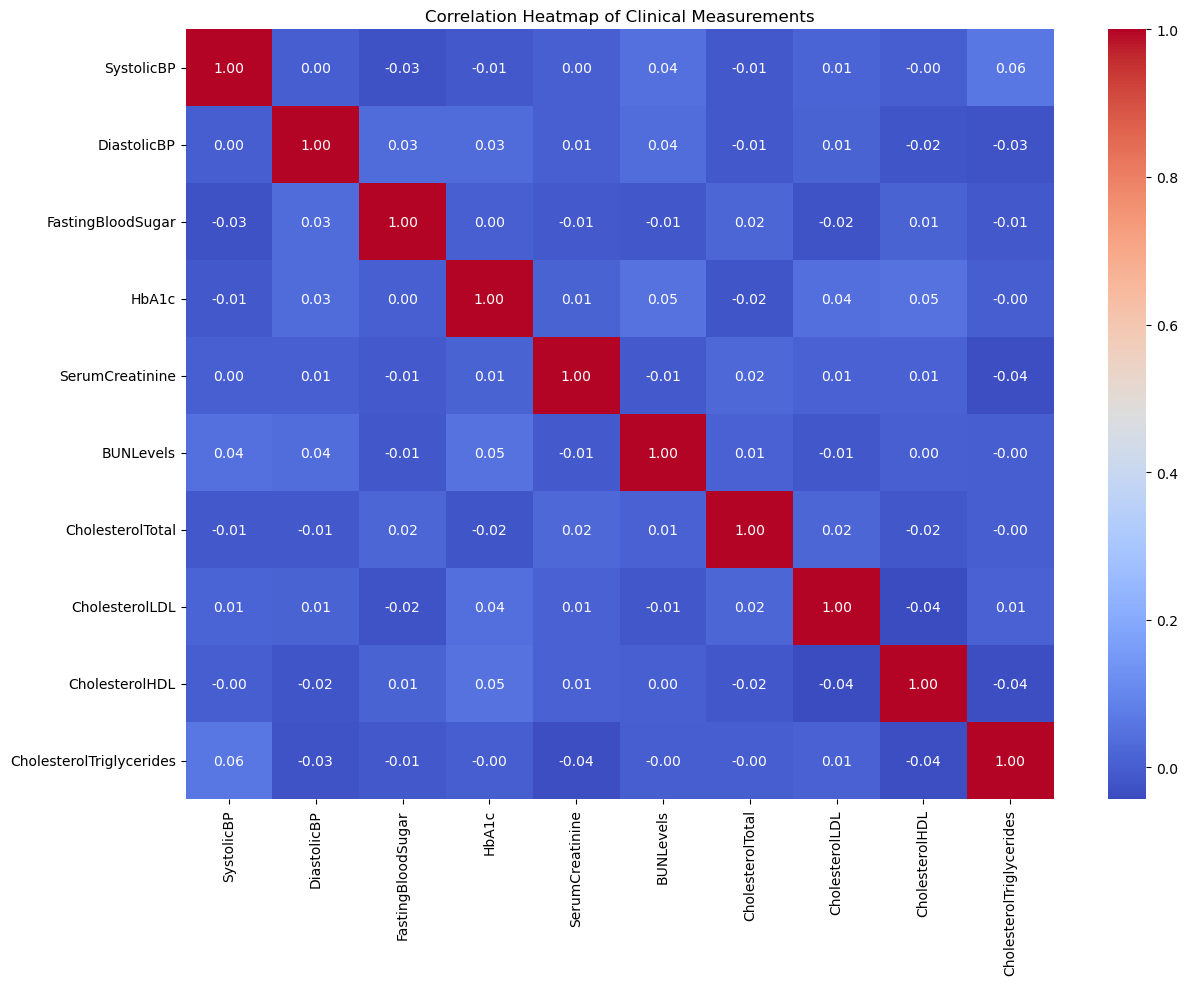

In [22]:
plt.figure(figsize=(14, 10))
clinical_columns = ['SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides']
sns.heatmap(df[clinical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Clinical Measurements')
plt.show()

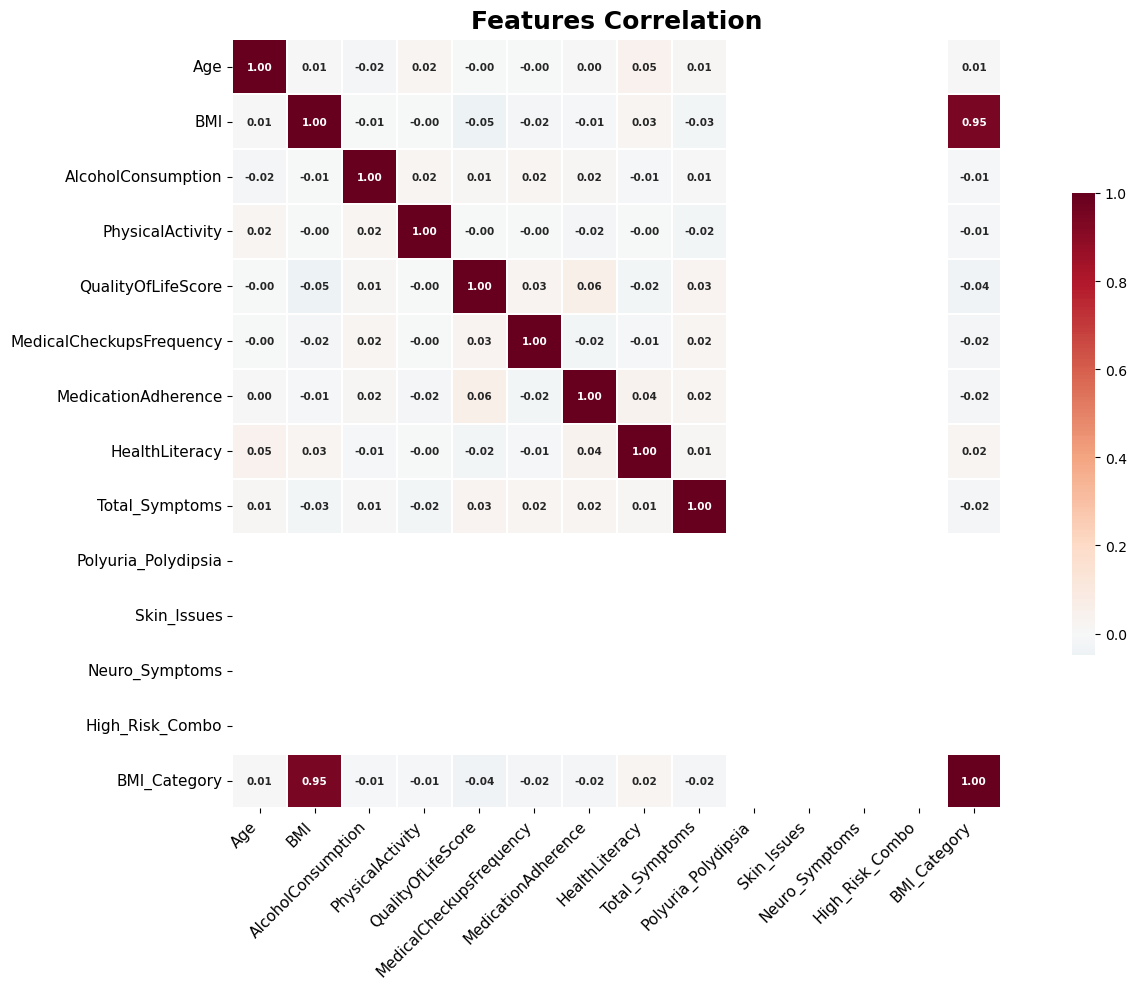

In [23]:
plt.figure(figsize=(15, 10))

sns.heatmap(df[['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity',
                'QualityOfLifeScore', 'MedicalCheckupsFrequency',
                'MedicationAdherence', 'HealthLiteracy',
                'Total_Symptoms', 'Polyuria_Polydipsia', 'Skin_Issues',
                'Neuro_Symptoms', 'High_Risk_Combo', 'BMI_Category']].corr(),
            annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            linewidths=0.3, square=True, cbar_kws={"shrink": 0.6},
            annot_kws={"size": 7.5, "weight": "bold"})

plt.title('Features Correlation', fontsize=18, fontweight='bold', pad=8)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.show()


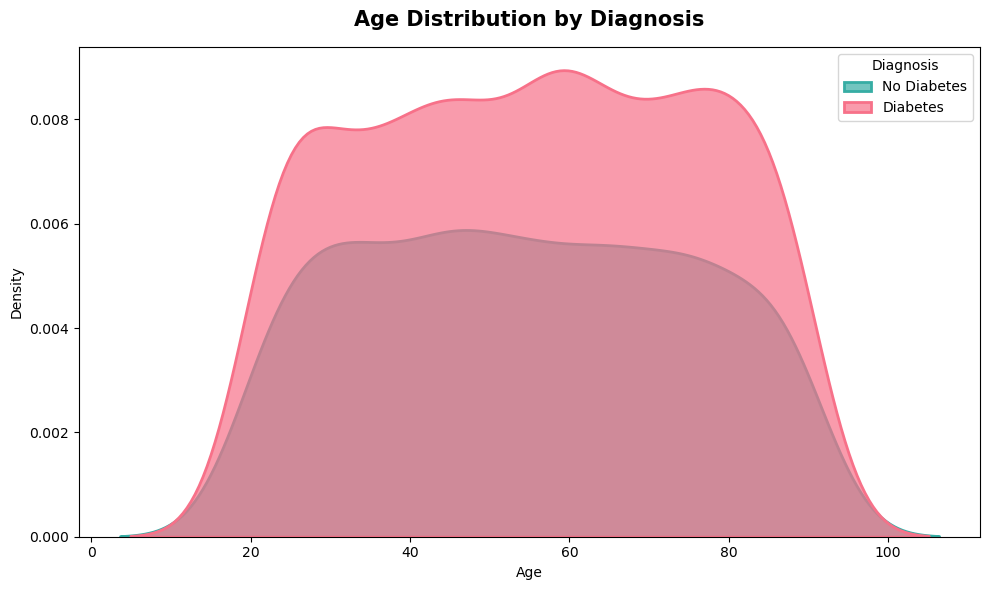

In [24]:
fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('white')

sns.kdeplot(data=df, x='Age', hue='Diagnosis', fill=True, palette='husl', alpha=0.7, linewidth=2)
plt.title('Age Distribution by Diagnosis', fontweight='bold', fontsize=15, pad=15)
plt.legend(title='Diagnosis', labels=['No Diabetes', 'Diabetes'])

plt.tight_layout()
plt.show()

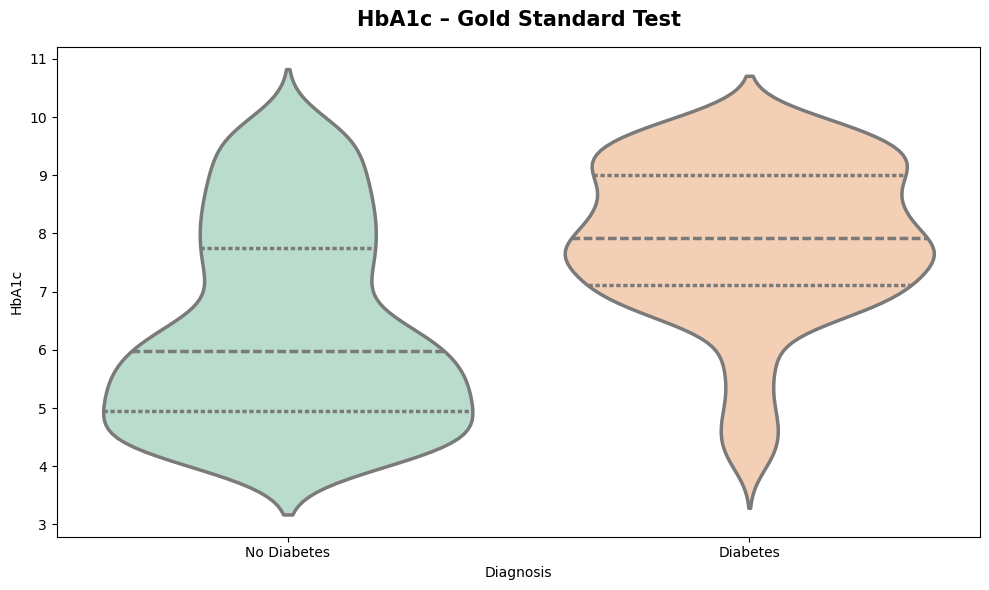

In [25]:
fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('white')

sns.violinplot(x='Diagnosis', y='HbA1c', data=df, palette='Pastel2', inner='quartile', linewidth=2.5)
plt.title('HbA1c – Gold Standard Test', fontweight='bold', fontsize=15, pad=15)
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])

plt.tight_layout()
plt.show()

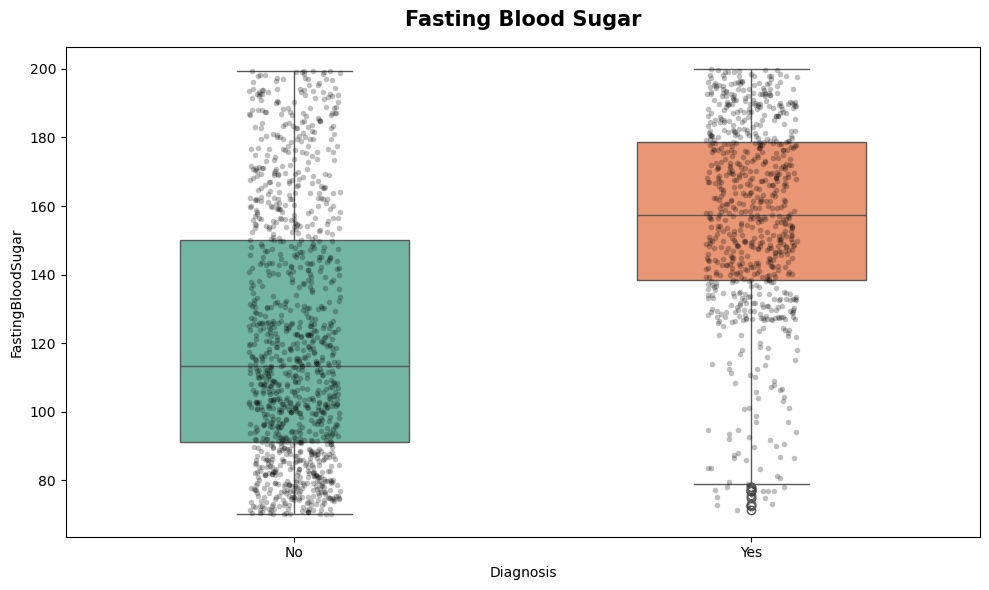

In [26]:
fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('white')

sns.boxplot(x='Diagnosis', y='FastingBloodSugar', data=df, palette='Set2', width=0.5)
sns.stripplot(x='Diagnosis', y='FastingBloodSugar', data=df, color='black', alpha=0.25, size=4)
plt.title('Fasting Blood Sugar', fontweight='bold', fontsize=15, pad=15)
plt.xticks([0, 1], ['No', 'Yes'])

plt.tight_layout()
plt.show()

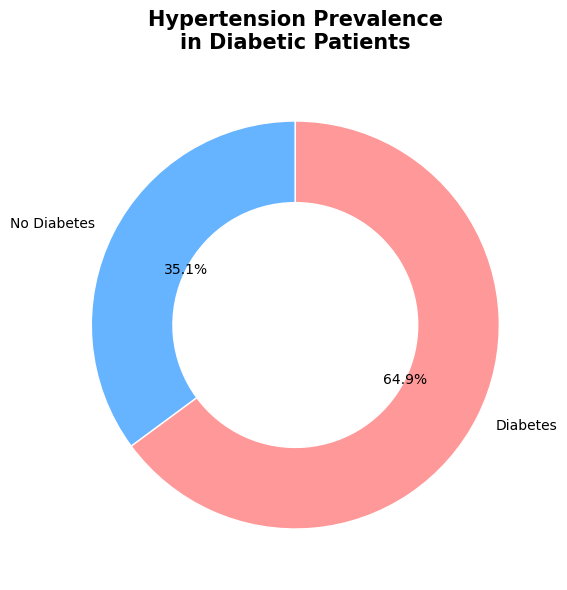

In [27]:
fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('white')

sizes = df.groupby('Diagnosis')['Hypertension'].mean() * 100
colors = ['#66b3ff', '#ff9999']
wedges, texts, autotexts = plt.pie(sizes, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%',
                                     startangle=90, colors=colors, wedgeprops=dict(width=0.4, edgecolor='white'))
plt.title('Hypertension Prevalence\nin Diabetic Patients', fontweight='bold', fontsize=15, pad=15)

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

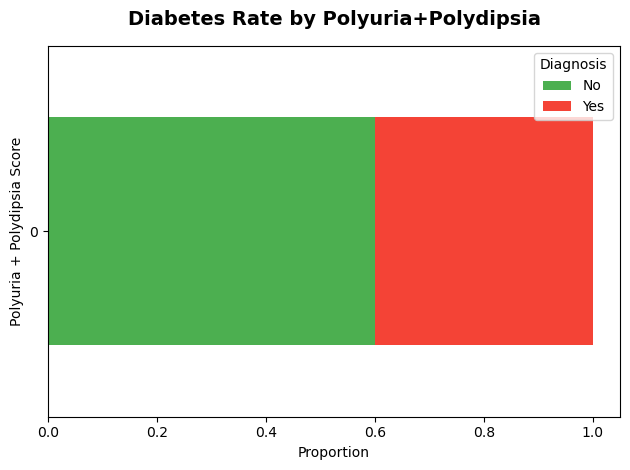

In [28]:
fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('white')

cross = pd.crosstab(df['Polyuria_Polydipsia'], df['Diagnosis'])
cross_pct = cross.div(cross.sum(1), axis=0)
cross_pct.plot(kind='barh', stacked=True, color=['#4CAF50', '#F44336'], width=0.8)
plt.title('Diabetes Rate by Polyuria+Polydipsia',
          fontweight='bold', fontsize=14, pad=15)
plt.xlabel('Proportion')
plt.ylabel('Polyuria + Polydipsia Score')
plt.legend(title='Diagnosis', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

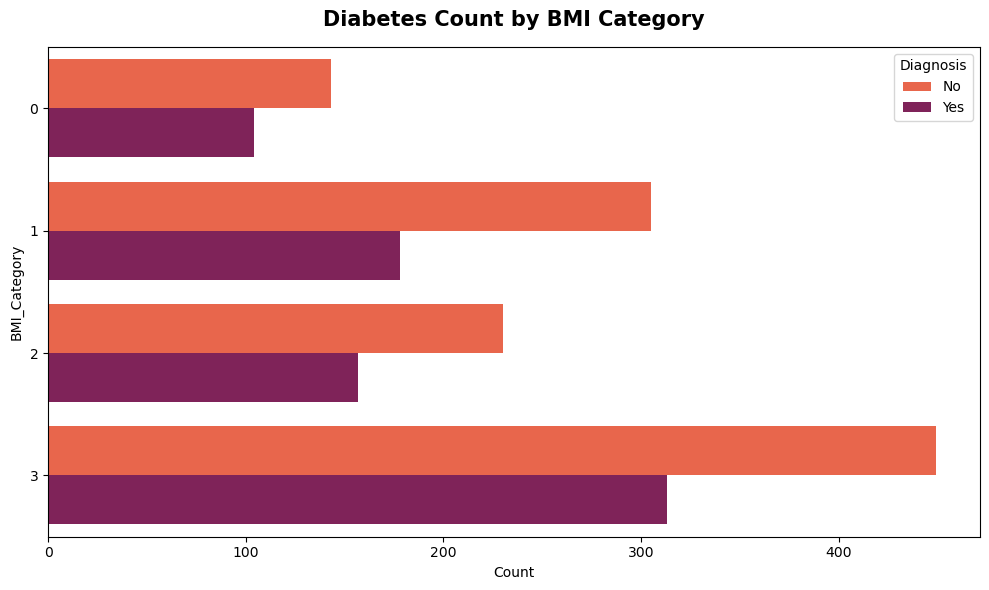

In [29]:
fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('white')

sns.countplot(y='BMI_Category', hue='Diagnosis', data=df, palette='rocket_r', saturation=0.9)
plt.title('Diabetes Count by BMI Category', fontweight='bold', fontsize=15, pad=15)
plt.xlabel('Count')
plt.legend(title='Diagnosis', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()